In [150]:
import numpy as np
import rawpy
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress

In [142]:
images = "/Users/David_Sauer/Documents/Biophysik/diffusion-analysis/experiments/tinte-blau-april/pictures/"
areas = images + "areas.csv"
bit_depth = 2**12
dilutions = [500,750,1000,2000,4000,8000]
#FIXME: Use relative path instead

In [143]:
def read(dilution, x, y, xlen, ylen):
    y = y + y%2
    x = x + x%2
    xlen = xlen + xlen%2
    ylen = ylen + ylen%2
    img_data = None
    with rawpy.imread(images+str(dilution)+".DNG") as raw:
        img_data = raw.raw_image.copy()
        black = np.array(raw.black_level_per_channel).mean()
    ret = img_data[y:y+ylen,x:x+xlen]
    return (ret, black)

def get_boundaries(dilution):
    with open(areas) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if row[0] == str(dilution):
                if row[1] == "NA":
                    raise RuntimeError("Areas not defined.")
                return [int(n) for n in row[1:]]
            
def _intensity(dilution, boundaries):
    x, y, xlen, ylen, xctrl, yctrl, xlenctrl, ylenctrl = boundaries
    arr_a, black_a = read(dilution, x, y, xlen, ylen)
    arr_c, black_c = read(dilution, xctrl, yctrl, xlenctrl, ylenctrl)
    a_val = bit_depth-(arr_a.mean()-black_a)
    c_val = bit_depth-(arr_c.mean()-black_c)
    return (np.log10(a_val/c_val), dilution)

def intensity(dilution):
    return _intensity(dilution, get_boundaries(dilution))[0]

In [147]:
intensities = []
concentrations = []

for dil in dilutions:
    intensities.append(intensity(dil))
    concentrations.append(1/dil)

R: 0.9641043984418812, p 0.008119764169411918


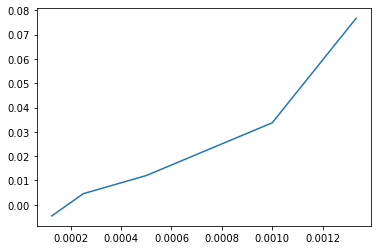

In [155]:
plt.plot(concentrations[1:], intensities[1:])
slope, intercept, r_value, p_value, std_err = linregress(concentrations[1:], intensities[1:])
print("R: {}, p {}".format(r_value, p_value))